# Introduction to Partial Differential Equations (PDEs) for Spatial Population Modeling

Partial Differential Equations (PDEs) are essential tools in mathematical modeling, enabling the description of various phenomena involving functions of multiple variables and their partial derivatives. Unlike Ordinary Differential Equations (ODEs), which involve derivatives with respect to a single variable, PDEs handle changes across multiple dimensions, such as time and space.

## PDEs in Spatial Modeling

In spatial population modeling, PDEs are used to represent how population density evolves over time and space, taking into account factors like natural growth, dispersion, and environmental influences. A common PDE used in such models is the diffusion equation.

## The Diffusion Equation

The diffusion equation models the spread of a population in space, reflecting the movement from high-density to low-density areas:

$$
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}
$$

- $u(x, t)$: Population density at position $x$ and time $t$.
- $D$: Diffusion coefficient, indicating the rate of spread.

This equation is analogous to heat diffusion, representing how populations disperse over time.


## 1D diffusion

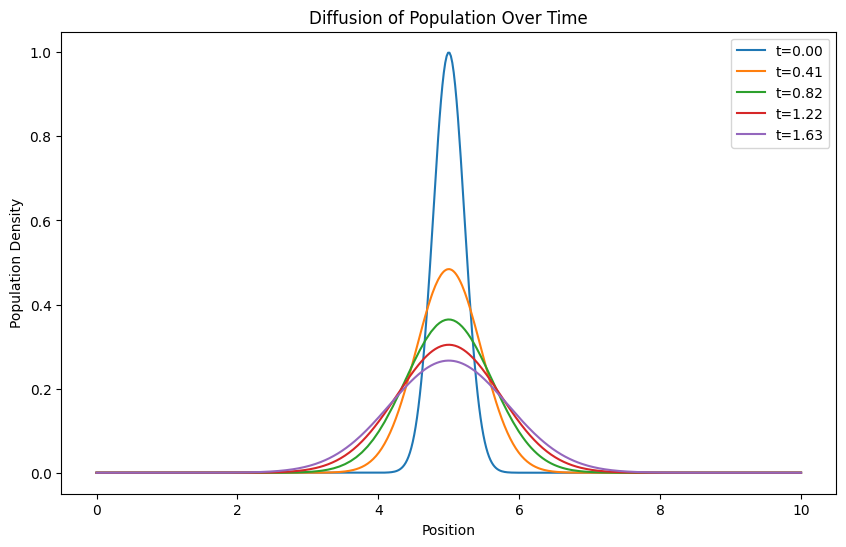

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Spatial domain
L = 10  # Length of the domain
Nx = 500  # Number of spatial points
x = np.linspace(0, L, Nx)  # Spatial grid
dx = x[1] - x[0]  # Spatial step size

# Diffusion coefficient
D = 0.2

# Initial population distribution: centered at L/2
u_initial = np.exp(-((x - L/2)**2) / 0.1)

# Diffusion equation as a system of ODEs
def diffusion(t, u):
    dudx2 = np.zeros(Nx)
    dudx2[1:-1] = (u[:-2] - 2*u[1:-1] + u[2:]) / dx**2
    # Neumann boundary conditions: zero flux at the boundaries
    dudx2[0] = dudx2[1]
    dudx2[-1] = dudx2[-2]
    return D * dudx2

# Time integration
t_eval = np.linspace(0, 2, 50)  # Time points to solve the PDE
sol = solve_ivp(diffusion, [0, 2], u_initial, method='RK45', t_eval=t_eval)

# Plotting
plt.figure(figsize=(10, 6))
for i in range(0, len(t_eval), 10):
    plt.plot(x, sol.y[:, i], label=f't={t_eval[i]:.2f}')
plt.xlabel('Position')
plt.ylabel('Population Density')
plt.legend()
plt.title('Diffusion of Population Over Time')
plt.show()


## 2D Diffusion Simulation

The 2D diffusion equation extends the concept of diffusion to two spatial dimensions, modeling the spread of a substance over a plane. It is represented as:

$$
\frac{\partial u}{\partial t} = D \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
$$

where $u(x, y, t)$ represents the concentration of the substance at position $(x, y)$ and time $t$, and $D$ is the diffusion coefficient.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def simulate_2d_diffusion(initial_state, D, dt, steps):
    """
    Simulates 2D diffusion process.
    
    Parameters:
    - initial_state: Initial concentration grid.
    - D: Diffusion coefficient.
    - dt: Time step.
    - steps: Number of simulation steps.
    
    Returns:
    - Final state after diffusion.
    """
    state = initial_state.copy()
    for _ in range(steps):
        state = state + D * gaussian_filter(state, sigma=1, mode='constant') * dt
    return state


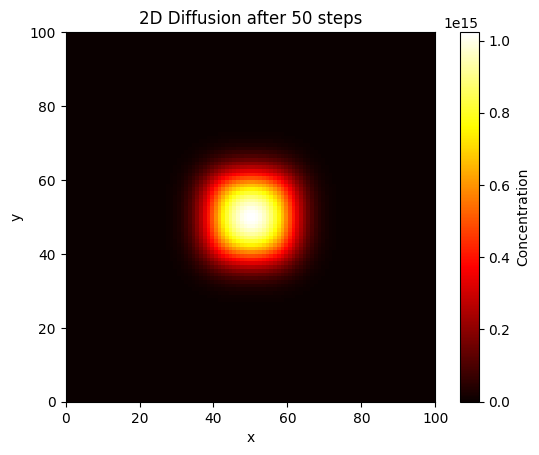

In [3]:
# Example usage
Lx, Ly = 100, 100  # Dimensions of the grid
initial_state = np.zeros((Lx, Ly))
initial_state[Lx//2 - 10:Lx//2 + 10, Ly//2 - 10:Ly//2 + 10] = 1  # Initial concentration block

# Simulation parameters
D = 1.0  # Diffusion coefficient
dt = 1.0  # Time step
steps = 50  # Number of steps

# Simulate
final_state = simulate_2d_diffusion(initial_state, D, dt, steps)

# Plotting
plt.imshow(final_state, extent=[0, Lx, 0, Ly], origin='lower', cmap='hot')
plt.colorbar(label='Concentration')
plt.title('2D Diffusion after {} steps'.format(steps))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## saving intermediate stepsimport numpy as np

In [4]:
# Laplacian for 2D diffusion
LAPLACIAN_2D = np.array([[0,  1, 0],
                         [1, -4, 1],
                         [0,  1, 0]])

In [5]:
from scipy.ndimage import convolve

def diffusion_2d(initial_state, D, total_time, dt):
    state = initial_state.copy()
    n_steps = int(total_time/dt)
    solution = [initial_state]
    
    for t in range(n_steps):
        # apply the convolution
        laplacian = convolve(state, LAPLACIAN_2D)
        state += D * laplacian * dt
        solution.append(state.copy())
    return solution


In [6]:
# simulation parameters
total_time = 1000
dt = 0.1

# initial state
Lx = 100
Ly = 100
# initial_state = np.random.rand(Lx, Ly)
initial_state = np.zeros((Lx, Ly))
initial_state[40:50, 40:50] = 1
initial_state[50:60, 50:60] = 1


D = 1.0  # diffusion coefficient

solution = diffusion_2d(initial_state, D, total_time, dt)

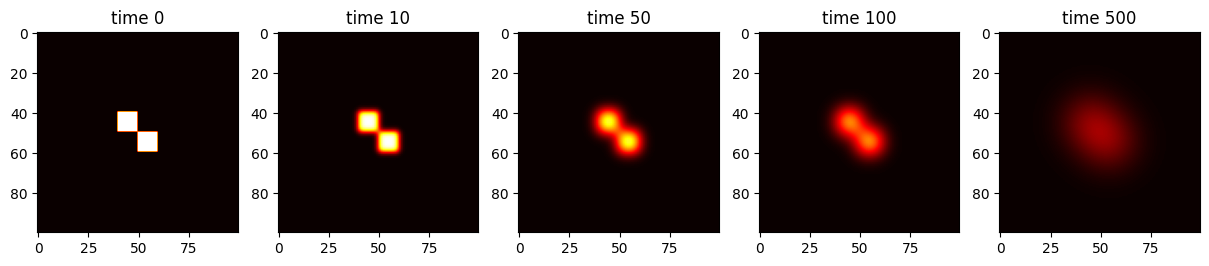

In [7]:
# plot
snapshot_steps = [0, 10, 50, 100, 500]

global_min = np.min([solution[step].min() for step in snapshot_steps])
global_max = np.max([solution[step].max() for step in snapshot_steps])

fig, axes = plt.subplots(1, len(snapshot_steps), figsize=(15, 5))
for i, step in enumerate(snapshot_steps):
    im = axes[i].imshow(solution[step], 
                   vmin=global_min, vmax=global_max,
                   cmap='hot'
                  )
    axes[i].set_title(f'time {step}')
    # fig.colorbar(im, ax=axes[i])
plt.show()

## Boundary Conditions in Diffusion Simulations

In simulations of physical processes like diffusion, boundary conditions define how the variables behave at the boundaries of the simulation domain. They are crucial for accurately modeling and solving partial differential equations (PDEs) numerically. There are several types of boundary conditions commonly used:

- **Dirichlet Boundary Condition**: The value of the function is fixed at the boundary. For diffusion, this could represent a fixed concentration of the diffused substance at the edges.
- **Neumann Boundary Condition**: The gradient of the function is fixed at the boundary. In physical terms, this could represent a constant flux of substance into or out of the domain.
- **Periodic Boundary Condition**: The values at the boundaries of the domain are wrapped around to the opposite side, creating a "loop" of the simulation space. This is useful for simulating infinite or cyclic systems.

Each type models different physical scenarios and influences how the simulation is set up and computed. Understanding and correctly applying boundary conditions is vital for accurate and meaningful simulation results.

In [8]:
from scipy.ndimage import convolve

def diffusion_2d_with_convolve_modes(initial_state, D, total_time, dt, mode='constant', cval=0):
    state = initial_state.copy()
    n_steps = int(total_time / dt)
    solution = [initial_state]
    
    for t in range(n_steps):
        # Convolve with specified mode
        laplacian = convolve(state, LAPLACIAN_2D, mode=mode, cval=cval)
        state += D * laplacian * dt
        solution.append(state.copy())
    return solution

def diffusion_2d_gradient_boundary(initial_state, D, total_time, dt, mode='constant', cval=0):
    state = initial_state.copy()
    n_steps = int(total_time / dt)
    solution = [initial_state]
    
    for t in range(n_steps):
        # Convolve with specified mode
        laplacian = convolve(state, LAPLACIAN_2D, mode=mode, cval=cval)
        state += D * laplacian * dt

        # Manually set boundaries after the convolution step
        state[0, :] = 0  # Top edge fixed at 0
        state[-1, :] = 1  # Bottom edge fixed at 1

        solution.append(state.copy())
    return solution

In [9]:
def plot_solution(solution, times):
    fig, axs = plt.subplots(1, len(times), figsize=(15, 5))
    for ax, time in zip(axs, times):
        ax.imshow(solution[int(time / 0.1)], cmap='viridis')
        ax.set_title(f'Time = {time}s')
    plt.show()

In [10]:
# Initial state: concentration peak in the center
# initial_state = np.zeros((100, 100))

length = 20
initial_state = np.random.rand(length, length)
initial_state[0:int(length/2),0:int(length/2)]= 1

# Diffusion coefficient
D = 0.1

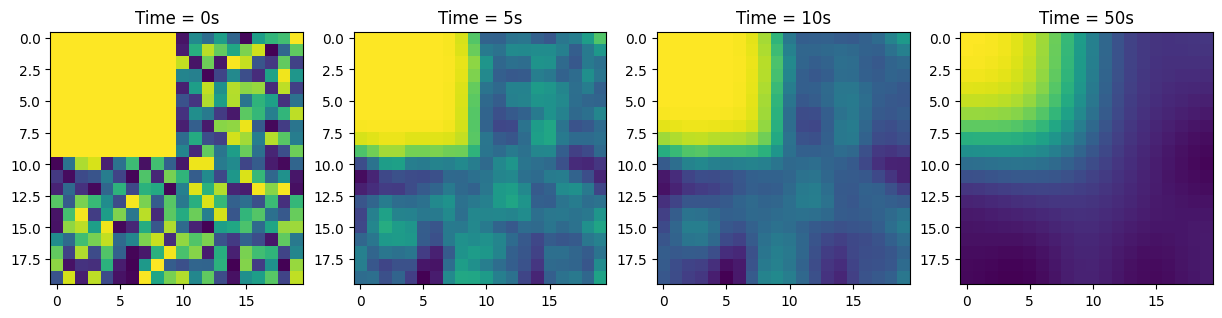

In [11]:
# Assuming initial_state and D are defined as before
solution_neumann = diffusion_2d_with_convolve_modes(initial_state, D, 50, 0.1, mode='nearest')

plot_solution(solution_neumann, [0, 5, 10, 50])

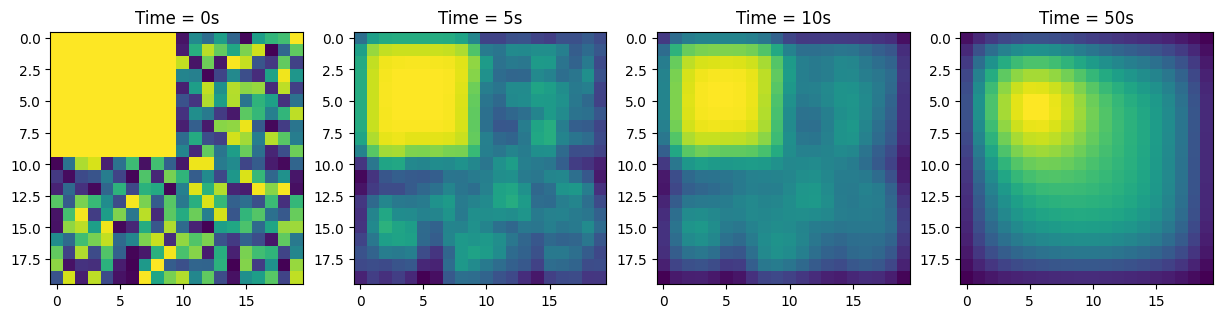

In [12]:
# For Dirichlet boundary conditions with a value of 0
solution_dirichlet = diffusion_2d_with_convolve_modes(initial_state, D, 50, 0.1, mode='constant', cval=0)

plot_solution(solution_dirichlet, [0, 5, 10, 50])

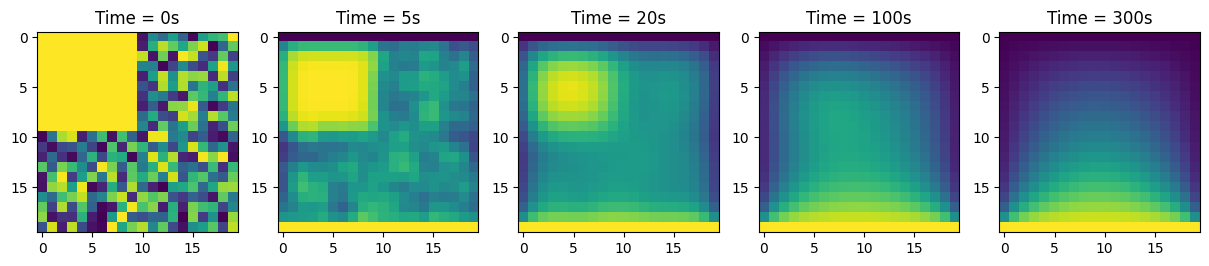

In [13]:
solution_gradient = diffusion_2d_gradient_boundary(initial_state, D, 300, 0.1, mode='constant', cval=0)

plot_solution(solution_gradient, [0, 5, 20, 100, 300])

## Non-Uniform Diffusion Coefficients in Simulations

In many real-world diffusion processes, the diffusion coefficient is not constant but varies spatially or temporally across the medium. This scenario is known as non-uniform diffusion. Accounting for non-uniform diffusion coefficients can significantly enhance the accuracy of simulations, allowing for more realistic modeling of physical and biological processes.

Non-uniform diffusion is essential in scenarios where material properties vary across the domain, such as:

- **Heterogeneous materials**: Composites or geological formations where different regions have distinct diffusive properties.
- **Temperature-dependent diffusion**: In some cases, the diffusion rate increases with temperature, leading to spatial variations in diffusion rates if the temperature is not uniform.
- **Biological systems**: Tissues or cellular structures where the permeability and therefore the diffusion coefficient can vary significantly.

Incorporating non-uniform diffusion into simulations requires the diffusion coefficient to be defined as a function of space (and possibly time), modifying the governing equations accordingly. This approach leads to more complex numerical models but offers insights into the dynamics of diffusion in heterogeneous systems.

In [14]:
from scipy.ndimage import convolve

def diffusion_2d_non_uniform_D(initial_state, D, total_time, dt, mode='constant', cval=0):
    state = initial_state.copy()
    n_steps = int(total_time / dt)
    solution = [initial_state]
    
    for t in range(n_steps):
        # Apply the convolution to get the laplacian
        laplacian = convolve(state, LAPLACIAN_2D, mode=mode, cval=cval)
        
        # Check if D is a matrix for non-uniform diffusion
        if isinstance(D, np.ndarray) and D.shape == state.shape:
            # Apply the diffusion equation with element-wise multiplication for non-uniform D
            state += D * laplacian * dt
        else:
            # Apply the diffusion equation normally if D is a constant
            state += D * laplacian * dt
            
        solution.append(state.copy())
    return solution

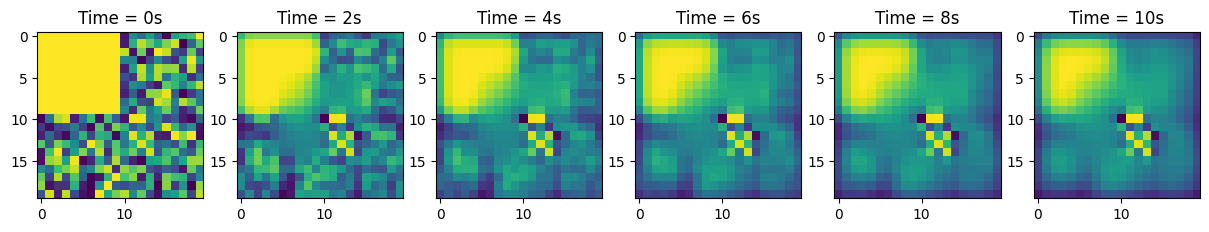

In [15]:
D_non_uniform = np.ones_like(initial_state) * 0.1  # Base diffusion coefficient
D_non_uniform[int(length/4):int(3*length/4),int(length/4):int(3*length/4)] = 1.0  # Increased diffusion in the center
D_non_uniform[int(length/2):int(3*length/4), int(length/2):int(3*length/4)] = 0.0

# Running the simulation with non-uniform D
solution_nonu = diffusion_2d_non_uniform_D(initial_state, D_non_uniform, 10, 0.1, mode='constant', cval=0)

plot_solution(solution_nonu, [0, 2, 4, 6, 8, 10])

## multiple species

In [16]:
def generalized_diffusion_2d(initial_states, diffusion_coeffs, total_time, dt):
    n_species = len(initial_states)
    current_states = [initial_state.copy() for initial_state in initial_states]
    solutions = [[initial_state.copy()] for initial_state in initial_states]
    n_steps = int(total_time / dt)
    
    for _ in range(n_steps):
        for i in range(n_species):
            laplacian = convolve(current_states[i], LAPLACIAN_2D, mode='reflect')
            current_states[i] += diffusion_coeffs[i] * laplacian * dt
            solutions[i].append(current_states[i].copy())
    
    return solutions

def plot_species_distributions(solutions, times, titles):
    n_species = len(solutions)
    n_times = len(times)
    
    fig, axs = plt.subplots(n_times, n_species, figsize=(3*n_species, 3*n_times))
    for i, time in enumerate(times):
        for j in range(n_species):
            ax = axs[i, j] if n_times > 1 else axs[j]
            img = ax.imshow(solutions[j][int(time / dt)], interpolation='nearest')
            ax.set_title(f'{titles[j]} at Time = {time}s')
            plt.colorbar(img, ax=ax)
    plt.tight_layout()
    plt.show()


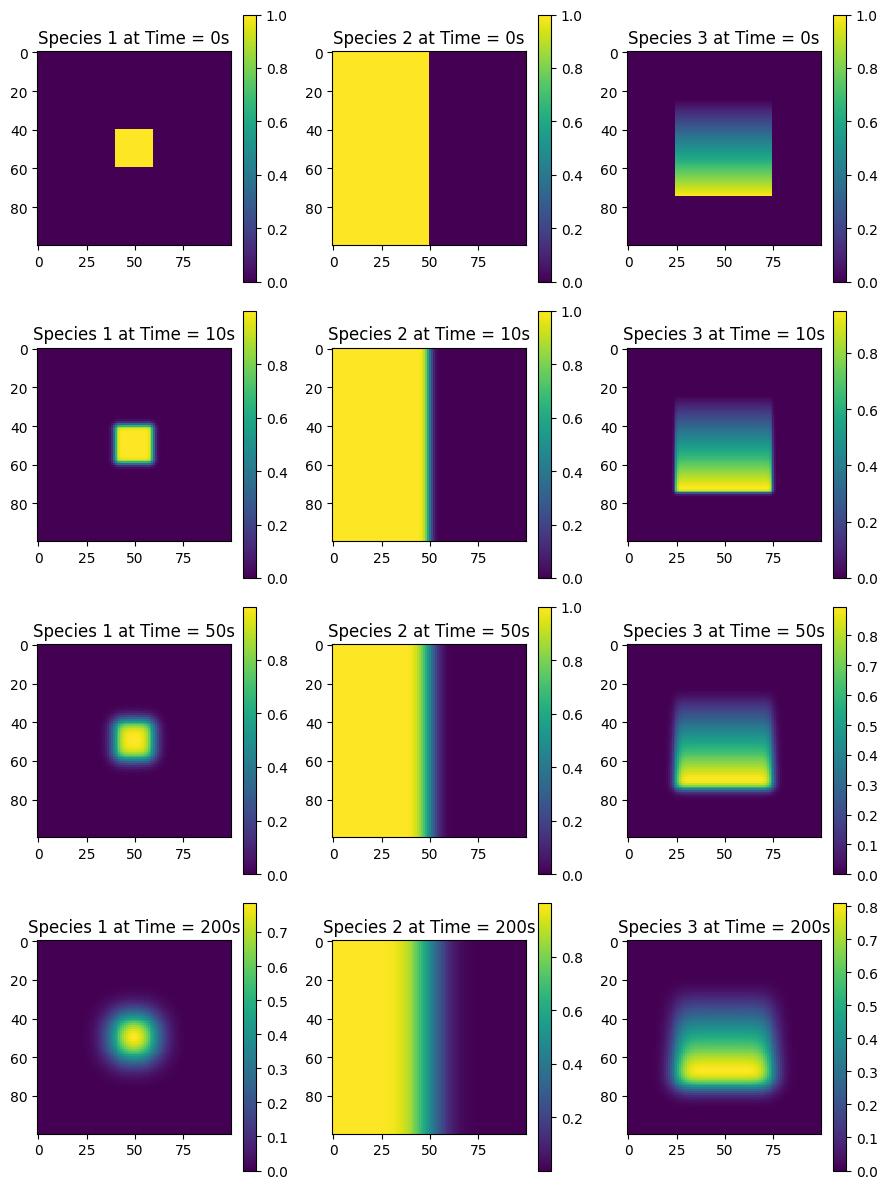

In [17]:
# Initial states for three species
initial_state_1 = np.zeros((100, 100))
initial_state_1[40:60, 40:60] = 1  # Center concentration

initial_state_2 = np.zeros((100, 100))
initial_state_2[:, :50] = 1  # Left half concentration

initial_state_3 = np.zeros((100, 100))
initial_state_3[25:75, 25:75] = np.linspace(0, 1, 50).reshape(-1, 1)  # Gradient from top to bottom in the center

# Diffusion coefficients for each species
D1 = 0.1
D2 = 0.2
D3 = 0.05

# Simulation parameters
total_time = 200
dt = 0.1

# Run simulation
solutions = generalized_diffusion_2d(
    [initial_state_1, initial_state_2, initial_state_3],
    [D1, D2, D3],
    total_time,
    dt
)

# Visualization
plot_species_distributions(solutions, [0, 10, 50, total_time], ['Species 1', 'Species 2', 'Species 3'])


## Advection

In [85]:
ss = np.zeros((4,4))
ss[0:2,0:2]= 1

print(f'initial {ss}')

xx = convolve(ss, np.array([[-1, 0, 1]]), mode='nearest') * (0, 0.1)[1]

print(f'convolution {xx}')

initial [[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
convolution [[0.  0.1 0.1 0. ]
 [0.  0.1 0.1 0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]


In [99]:
def generalized_advection_diffusion_2d(
    initial_states, 
    diffusion_coeffs, 
    advection_fields, 
    total_time, 
    dt,
    save_times
):
    n_species = len(initial_states)
    current_states = [initial_state.copy() for initial_state in initial_states]
    solutions = [[] for _ in initial_states]  # Initialize without copying initial state
    n_steps = int(total_time / dt)
    save_indices = [int(save_time / dt) for save_time in save_times]  # Convert save times to indices

    for step in range(n_steps + 1):  # +1 to include the last step
        for i in range(n_species):
            if step == 0 or step in save_indices:
                solutions[i].append(current_states[i].copy())  # Save only at specified times
            
            if step < n_steps:  # Skip the update on the last iteration
                laplacian = convolve(current_states[i], LAPLACIAN_2D, mode='constant', cval=0.5)
                advective_flux_x = convolve(current_states[i], np.array([[-1, 0, 1]]), mode='constant', cval=0.5) * advection_fields[i][0]
                advective_flux_y = convolve(current_states[i], np.array([[-1], [0], [1]]), mode='constant', cval=0.5) * advection_fields[i][1]
                current_states[i] += diffusion_coeffs[i] * laplacian * dt + (advective_flux_x + advective_flux_y) * dt

    return solutions

In [102]:
# Define the initial conditions, diffusion coefficients, and advection fields
l1 = 20
l2 = 5
initial_state_1 = np.ones((l1, l2)) * 0.1
# initial_state_1[int(l1/4):int(l1/2),int(l2/4):int(l2/2)]= 1
initial_state_1[int(l1/2),:]= 1

initial_state_2 = np.ones((l1, l2)) * 0.1  #np.random.rand(l1, l2) * 0.1
initial_state_2[int(l1/2),:]= 1

initial_states = [
    initial_state_1,
    initial_state_2,
    # np.ones((length, length)) * np.linspace(0, 1, 100), 
    # np.ones((length, length)) * np.linspace(1, 0, 100)
]

# Diffusion for species 1 and species 2
diffusion_coeffs = [0.0, 0.0]

# Advection for species 1 and species 2
advection_fields = [
    (0, 0.1), 
    (0, -0.1)
]  

# Run the simulation
totaltime = 200
save_times=[0, 50, 100, totaltime]
advection_solutions = generalized_advection_diffusion_2d(
    initial_states, 
    diffusion_coeffs, 
    advection_fields, 
    total_time=totaltime, 
    dt=0.001, 
    save_times=save_times)

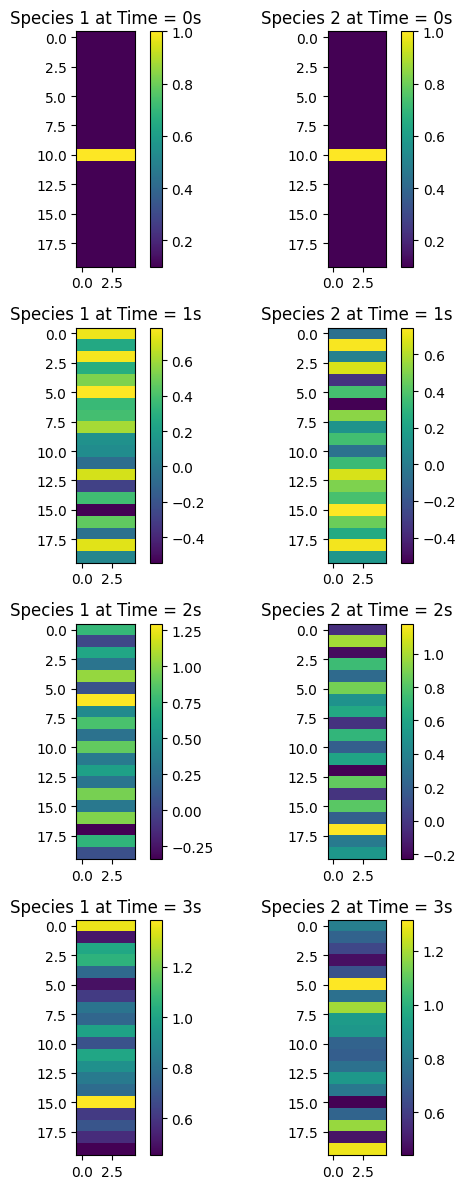

In [103]:
# Plot the results
plot_species_distributions(
    advection_solutions, 
    times=[i for i in range(len(save_times))], 
    titles=['Species 1', 'Species 2'])

## 2D Reaction-Diffusion

In [18]:
def reaction_diffusion_2d(initial_states, diffusion_coeffs, reaction_rate, total_time, dt):
    n_species = len(initial_states)
    current_states = [initial_state.copy() for initial_state in initial_states]
    solutions = [[initial_state.copy()] for initial_state in initial_states]
    n_steps = int(total_time / dt)
    
    for _ in range(n_steps):
        # Calculate the laplacians for diffusion
        laplacians = [convolve(state, LAPLACIAN_2D, mode='reflect') for state in current_states]
        
        # Apply the reaction: A + B -> C
        reaction_term = reaction_rate * current_states[0] * current_states[1] * dt
        
        # Update states based on diffusion and reaction
        for i in range(n_species):
            if i == 0:  # Species A
                current_states[i] -= reaction_term
            elif i == 1:  # Species B
                current_states[i] -= reaction_term
            elif i == 2:  # Species C
                current_states[i] += reaction_term
            
            current_states[i] += diffusion_coeffs[i] * laplacians[i] * dt
            solutions[i].append(current_states[i].copy())
    
    return solutions


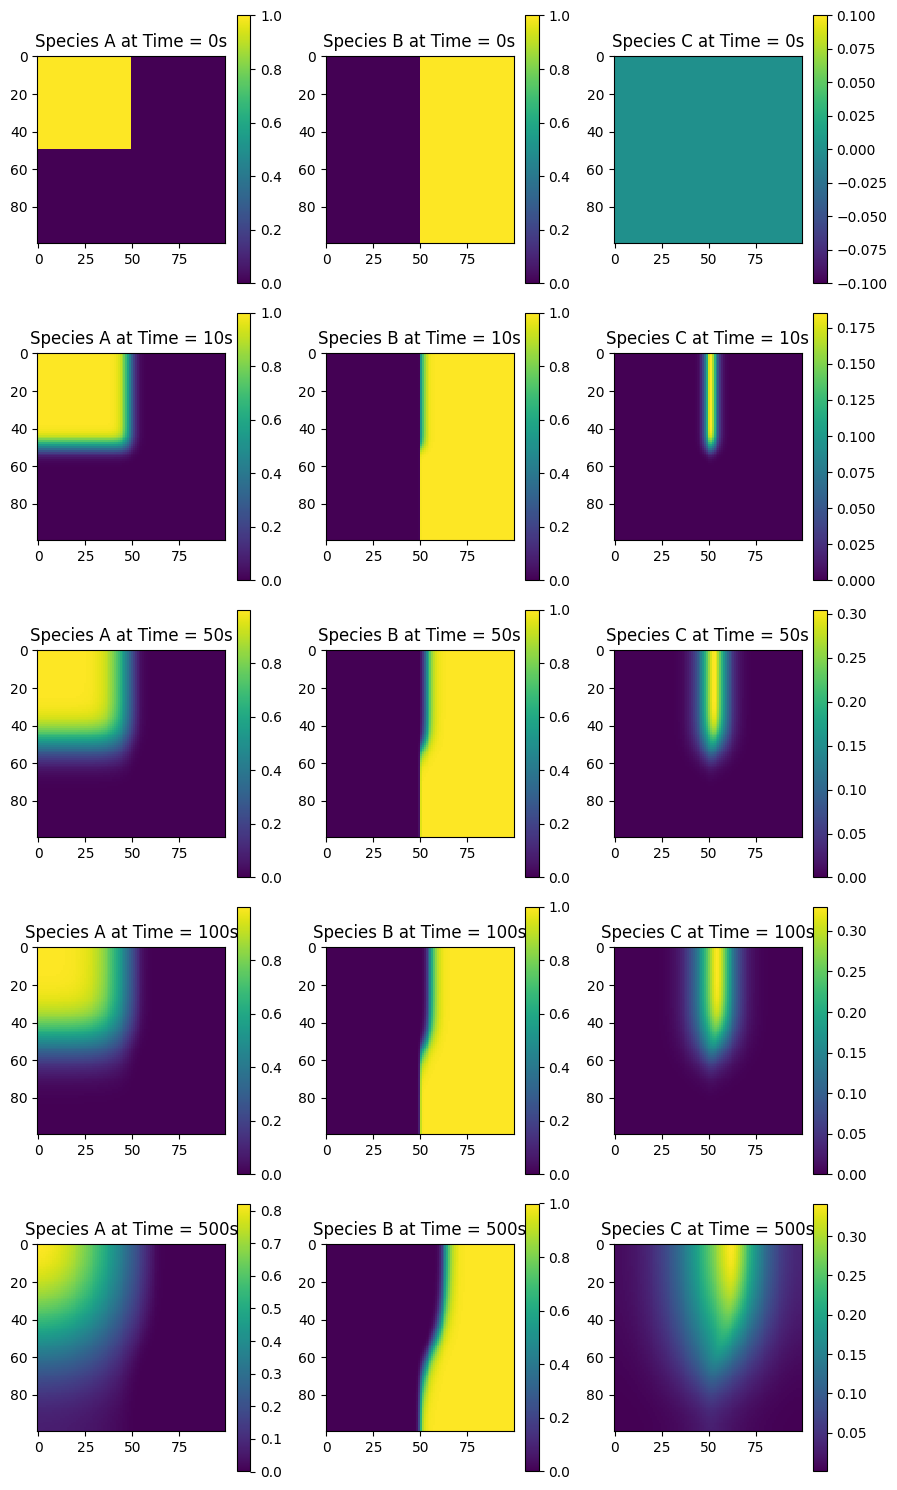

In [19]:
# Initial states: A and B are placed next to each other
initial_A = np.zeros((100, 100))
initial_A[:50, :50] = 1

initial_B = np.zeros((100, 100))
initial_B[:, 50:] = 1

initial_C = np.zeros((100, 100))


# Diffusion coefficients and reaction rate
D_A = 0.8
D_B = 0.001
D_C = 0.5
reaction_rate = 0.2

# simulation params
total_time = 500
dt=0.1

# Run the simulation
solutions = reaction_diffusion_2d(
    [initial_A, initial_B, initial_C],
    [D_A, D_B, D_C],
    reaction_rate,
    total_time=total_time,
    dt=dt
)

# Visualization (focusing on A and B)
plot_species_distributions(solutions, [0, 10, 50, 100, total_time], ['Species A', 'Species B', 'Species C'])


### Gray-Scott Model Simulation

The Gray-Scott model is a reaction-diffusion system described by two partial differential equations (PDEs) that simulate the interaction and diffusion of two chemical species. These interactions can produce a variety of patterns, reminiscent of those seen in nature, such as spots, stripes, and spirals. The model equations are:

$$
\frac{\partial u}{\partial t} = D_u \nabla^2 u - uv^2 + F(1 - u)
$$
$$
\frac{\partial v}{\partial t} = D_v \nabla^2 v + uv^2 - (F + k) v
$$

where:
- $u$ and $v$ represent the concentrations of the two chemical species,
- $D_u$ and $D_v$ are their respective diffusion rates,
- $F$ is the feed rate of $u$,
- $k$ is the kill rate of $v$,
- $\nabla^2$ denotes the Laplacian operator, representing diffusion.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import laplace

def simulate_gray_scott(U, V, Du, Dv, F, k, dt, steps, save_step=10):
    """
    Simulates the Gray-Scott model.
    
    Parameters:
    - U, V: Initial concentrations of the two chemical species.
    - Du, Dv: Diffusion coefficients for U and V.
    - F, k: Feed rate of U and kill rate of V, respectively.
    - dt: Time step.
    - steps: Number of simulation steps.
    - save_step: Interval between saved time steps.
    
    Returns:
    - List of tuples containing (U, V) states at each saved time step.
    """
    states = [(U.copy(), V.copy())]
    for step in range(steps):
        laplaceU = laplace(U, mode='reflect')
        laplaceV = laplace(V, mode='reflect')
        UVV = U*V**2
        U += (Du*laplaceU - UVV + F*(1-U)) * dt
        V += (Dv*laplaceV + UVV - (F + k)*V) * dt
        if step % save_step == 0 or step == steps:  # Save at intervals and last step
            states.append((U.copy(), V.copy()))
    return states

In [21]:
# Initial conditions
size = 200  # Size of the 2D grid
U = np.ones((size, size))
V = np.zeros((size, size))
mid = size // 2
width = 20
U[mid-width:mid+width, mid-width:mid+width] = 0.50
V[mid-width:mid+width, mid-width:mid+width] = 0.25

# Parameters
Du, Dv = 0.10, 0.05  # Diffusion rates. Du is double Dv
F, k = 0.030, 0.06  # 0.060, 0.062 Feed and kill rates
dt = 1.0  # Time step
steps = 8000  # Number of simulation steps
save_step = 10

# Simulation
states = simulate_gray_scott(U, V, Du, Dv, F, k, dt, steps, save_step=save_step)

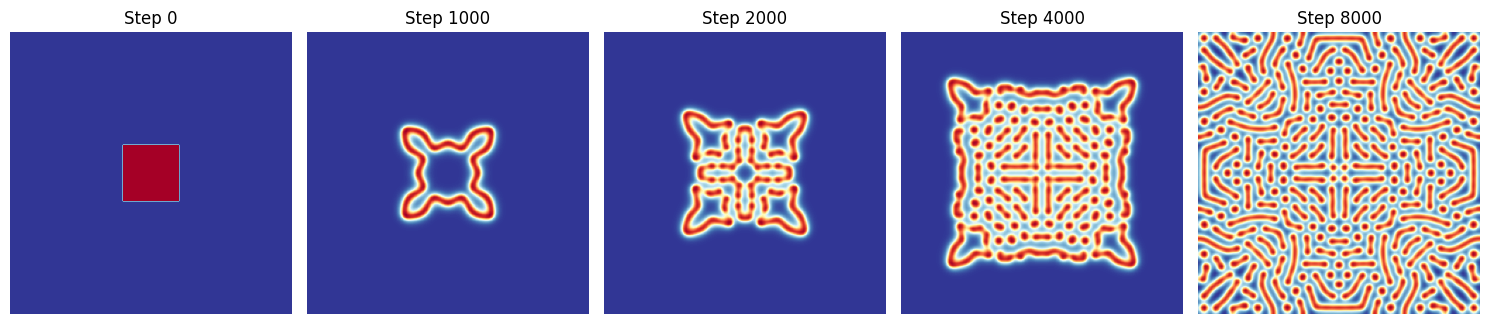

In [22]:
# Visualization of a few states
total_saved = int(steps/save_step)
selected_steps = [
    0, 
    int(total_saved/8), 
    int(total_saved/4), 
    int(total_saved/2), 
    total_saved]  # Indices of the states to visualize

fig, axes = plt.subplots(1, len(selected_steps), figsize=(15, 4))
for i, idx in enumerate(selected_steps):
    U, V = states[idx]
    axes[i].imshow(U, cmap='RdYlBu')
    axes[i].axis('off')
    axes[i].set_title(f'Step {idx*10}')
plt.tight_layout()
plt.show()

## interactive widget for gray-scott system

In [23]:
from ipywidgets import interactive, FloatSlider, IntSlider

def interactive_gray_scott(Du=0.16, F=0.060, k=0.062, steps=1000):

    # hardcoded parameters
    size=200
    Dv = Du/2 # Dv is half Du
    
    # Initial conditions
    U = np.ones((size, size))
    V = np.zeros((size, size))
    mid = int(size // 2)
    width = 20
    U[mid-width:mid+width, mid-width:mid+width] = 0.50
    V[mid-width:mid+width, mid-width:mid+width] = 0.25

    dt = 1.0  # Time step
    num_snapshots = 5  # Desired number of snapshots
    save_step = max(1, steps // (num_snapshots - 1))  # Adjusted calculation for save_step

    # Simulation
    states = simulate_gray_scott(U, V, Du, Dv, F, k, dt, steps, save_step)

    # Plotting snapshots
    fig, axes = plt.subplots(1, num_snapshots, figsize=(15, 3))
    snapshot_indices = np.linspace(0, len(states) - 1, num_snapshots, dtype=int)  # Indices for snapshots
    for i, idx in enumerate(snapshot_indices):
        U, V = states[idx]
        # Calculate the actual time step for the title
        actual_step = idx * save_step
        if i < len(axes):  # Check to avoid IndexError
            axes[i].imshow(U, cmap='RdYlBu')
            axes[i].axis('off')
            axes[i].set_title(f'Time Step: {actual_step}')
    plt.tight_layout()
    plt.show()


In [24]:
# Widget sliders
w = interactive(interactive_gray_scott,
                # size=IntSlider(min=100, max=500, step=10, value=200, description='Size'),
                Du=FloatSlider(min=0.01, max=0.2, step=0.01, value=0.12, description='Du'),
                # Dv=FloatSlider(min=0.01, max=0.2, step=0.01, value=0.08, description='Dv'),
                F=FloatSlider(min=0.0001, max=0.1, step=0.0001, value=0.060, description='F'),
                k=FloatSlider(min=0.0001, max=0.1, step=0.0001, value=0.062, description='k'),
                steps=IntSlider(min=100, max=10000, step=100, value=5000, description='Steps'))

# Display the interactive widget
display(w)

interactive(children=(FloatSlider(value=0.12, description='Du', max=0.2, min=0.01, step=0.01), FloatSlider(val…